In [27]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/datasets'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [28]:
train_data = pd.read_csv(r'datasets/customer_churn_dataset-training-master.csv')
test_data = pd.read_csv(r'datasets/customer_churn_dataset-testing-master.csv')

In [29]:
train_data.dropna(how='all', inplace=True)
test_data.dropna(how='all', inplace=True)

In [30]:
train_data.iloc[1]

CustomerID               3.0
Age                     65.0
Gender                Female
Tenure                  49.0
Usage Frequency          1.0
Support Calls           10.0
Payment Delay            8.0
Subscription Type      Basic
Contract Length      Monthly
Total Spend            557.0
Last Interaction         6.0
Churn                    1.0
Name: 1, dtype: object

In [31]:
train_data.select_dtypes(include= 'number').describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


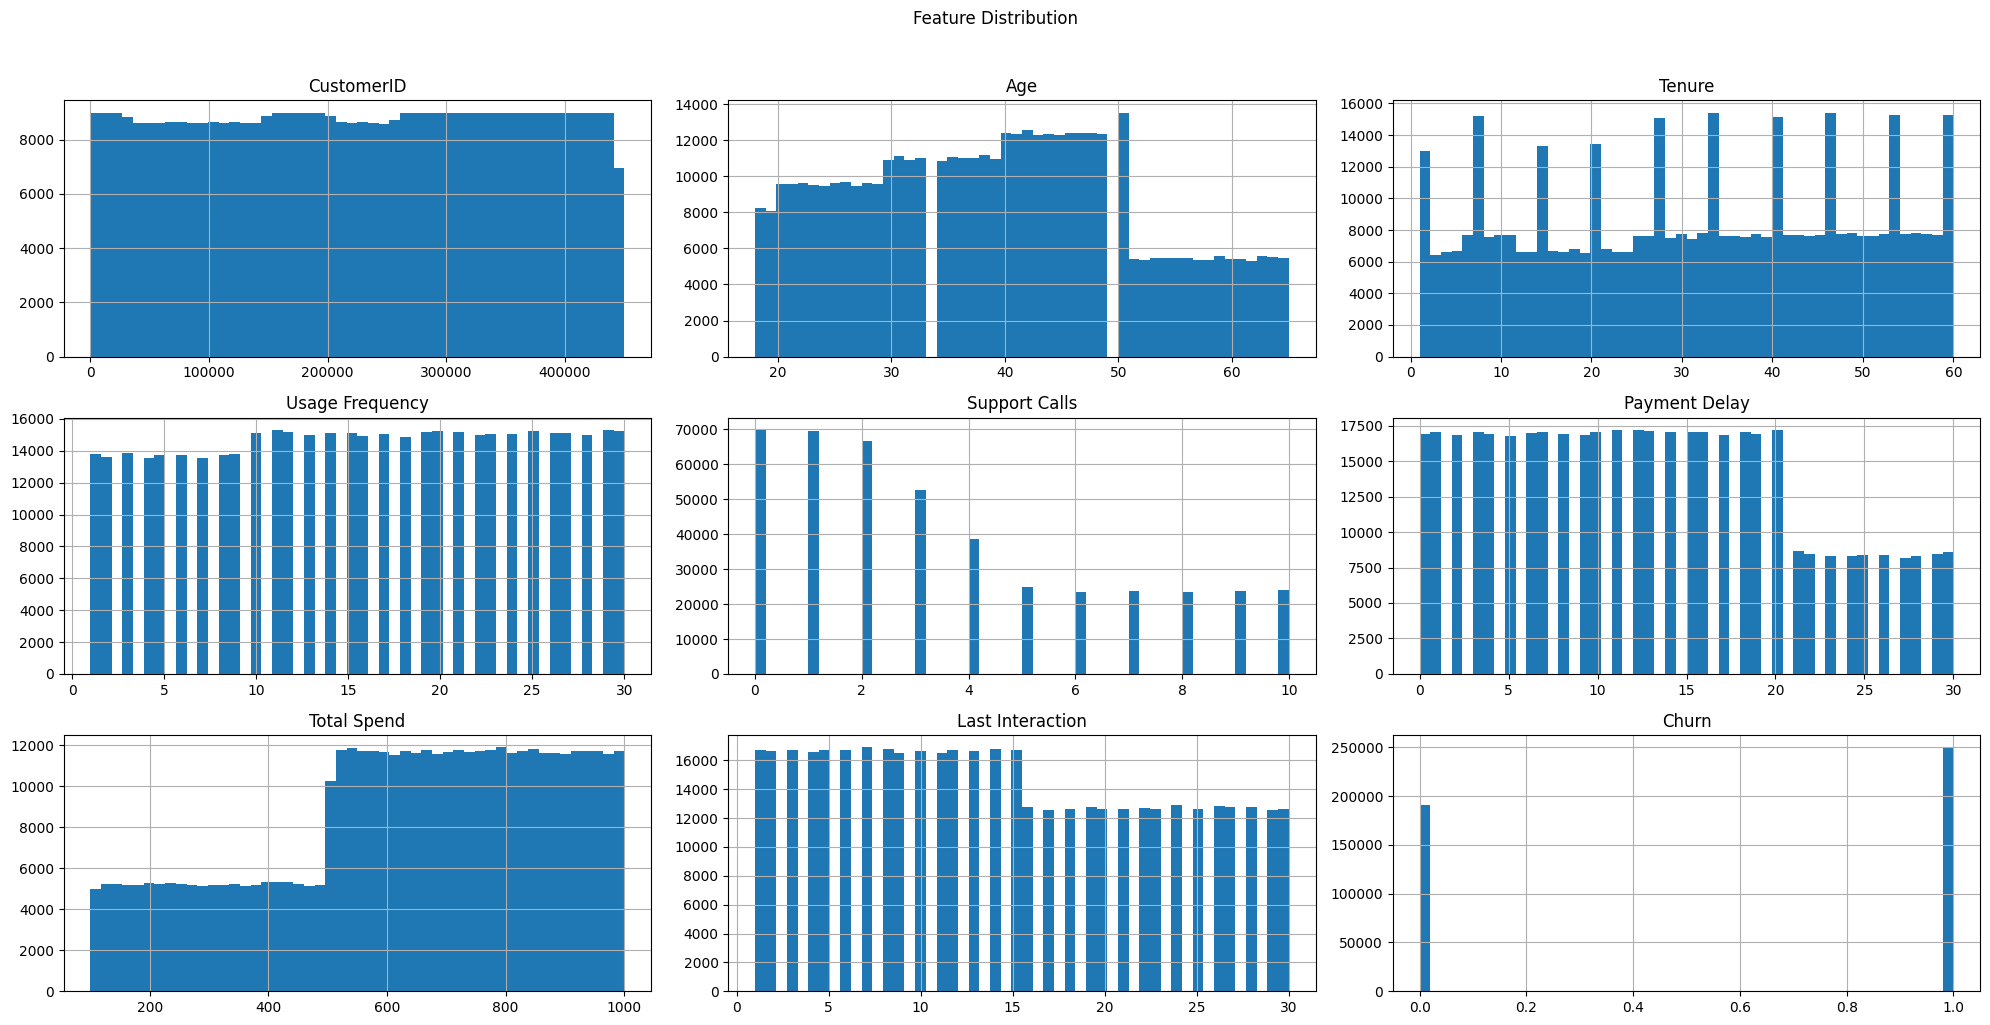

In [32]:
train_data.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [33]:
train_data.select_dtypes(include='object').describe()

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [34]:
train_data['Gender'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

In [35]:
train_data['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [36]:
train_data['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [37]:
def encode_data(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['Subscription Type'] = data['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 3})
    data['Contract Length'] = data['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})

In [38]:
# def encode_data(data, cols):
#     mappings = {}
#     for col in cols:
#         # Create and store mapping
#         mapping = dict(enumerate(data[col].astype('category').cat.categories))
#         mappings[col] = mapping
        
#         # Encode data
#         data[col] = data[col].astype('category').cat.codes
#     return mappings
# str_lst = ['Gender', 'Subscription Type', 'Contract Length']
# encode_data(train_data, str_lst)
# encode_data(test_data, str_lst)

In [39]:
encode_data(train_data)
encode_data(test_data)

In [40]:
X_train = train_data.iloc[:,1:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]

### TRAIN MODEL

In [41]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
model = LogisticRegression(max_iter=1000, C=0.01, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5904713082921677
Confusion Matrix:
 [[ 8054 25827]
 [  536 29957]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.24      0.38     33881
           1       0.54      0.98      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.74      0.61      0.54     64374
weighted avg       0.75      0.59      0.53     64374



In [43]:
feature_names = X_train.columns  # only works if X is a DataFrame
coefficients = model.coef_[0]

# Combine features and coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute impact
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

             Feature  Coefficient  Abs_Coefficient
7    Contract Length    -1.342376         1.342376
1             Gender     1.083527         1.083527
4      Support Calls     0.706918         0.706918
5      Payment Delay     0.104921         0.104921
9   Last Interaction     0.056572         0.056572
6  Subscription Type    -0.035343         0.035343
0                Age     0.034727         0.034727
3    Usage Frequency    -0.014133         0.014133
2             Tenure    -0.007136         0.007136
8        Total Spend    -0.005622         0.005622


#### Using random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [45]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.5033243234846366
Confusion Matrix:
 [[ 1948 31933]
 [   40 30453]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

AUC-ROC Score: 0.5625714473970997


### Revise model using standard scale

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [48]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
))
])

In [60]:
pipeline = Pipeline([
    ('scaler', Normalizer()),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ))
])

In [61]:
# Step 5: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 6: Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.5097710255693292
Confusion Matrix:
 [[ 2397 31484]
 [   74 30419]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.07      0.13     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.51     64374
   macro avg       0.73      0.53      0.40     64374
weighted avg       0.74      0.51      0.38     64374

AUC-ROC Score: 0.5877881833863936


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Step 5: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 6: Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.5904091714046044
Confusion Matrix:
 [[ 8049 25832]
 [  535 29958]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.24      0.38     33881
           1       0.54      0.98      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.74      0.61      0.54     64374
weighted avg       0.75      0.59      0.53     64374

AUC-ROC Score: 0.7668653180508695
